In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from warnings import filterwarnings 

In [2]:
# Initializing clean csv file

cleanpath = Path('../csv/clean_data.csv')
file = pd.read_csv(cleanpath)
file.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [3]:
# GENERAL
# Narrow down data set to relevant columns

sex_df = file[['ID','SEX','PREVALENT CHD','PERIOD']]
sex_df

chd = sex_df.loc[sex_df['PREVALENT CHD']=='YES',:]
chd
# 517 rows of CHD participants across all Periods, from clean data

chd_p1 = chd.loc[chd['PERIOD']==1,:]
chd_p1
# 64 in Period 1

chd_p3 = chd.loc[chd['PERIOD']==3,:]
chd_p3
# 300 in Period 3 (remainder in Period 2)

,ID,SEX,PREVALENT CHD,PERIOD
56,68397,M,YES,3
101,134914,F,YES,3
155,199546,F,YES,3
179,208566,M,YES,3
194,228129,F,YES,3
...,...,...,...,...
8192,9906195,F,YES,3
8225,9939850,F,YES,3
8234,9951694,M,YES,3
8240,9964282,M,YES,3


In [50]:
# CHOLESTROL AND CHD CORRELATION

#Create a new dataframe with relevant columns

chol_df = file[['ID','SEX','TOTAL CHOLESTROL','PREVALENT CHD','SMOKING STATUS','CIGS PER DAY','PERIOD']]
chol_df.head()


,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD
0,6238,F,250.0,NO,NO,0,1
1,6238,F,260.0,NO,NO,0,2
2,6238,F,237.0,NO,NO,0,3
3,11263,F,228.0,NO,NO,0,1
4,11263,F,230.0,NO,NO,0,2


In [51]:
# Bin Cholestrol into readable groups [abnormally low, healthy, at risk, abnormally high] (PRE-SEPERATING INTO PERIODS)

# CHOLESTROL LEVELS 
# < 120 = abnormally low
# 120-200 = healthy
#  200-239 =  at risk
# 240+ = abnormally high

#NOTE: 113.0 is the lowest cholestrol value in Period 1.
# and 464.0 is the highest in p1, 638 max in all periods.

bins = [0, 119.9,199.9,239,float('inf')]

bin_names = ['abnormally low','healthy','at risk','abnormally high']

#Slicing our data in bins

chol_df['CHOLESTROL LEVEL'] = pd.cut(chol_df['TOTAL CHOLESTROL'],bins,
                                     labels=bin_names,include_lowest=True)

chol_df.head(10)

/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_29094/987197550.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chol_df['CHOLESTROL LEVEL'] = pd.cut(chol_df['TOTAL CHOLESTROL'],bins,


,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
0,6238,F,250.0,NO,NO,0,1,abnormally high
1,6238,F,260.0,NO,NO,0,2,abnormally high
2,6238,F,237.0,NO,NO,0,3,at risk
3,11263,F,228.0,NO,NO,0,1,at risk
4,11263,F,230.0,NO,NO,0,2,at risk
5,11263,F,220.0,NO,NO,0,3,at risk
6,14367,M,260.0,NO,NO,0,1,abnormally high
7,14367,M,292.0,NO,NO,0,2,abnormally high
8,14367,M,280.0,NO,NO,0,3,abnormally high
9,16365,M,225.0,NO,YES,30,1,at risk


In [52]:
# Filter by Period 1 only

chol_p1 = chol_df.loc[chol_df['PERIOD']==1,:]
chol_p1

# Filter again by PREVALENCT CHD=='YES'

chol_p1 = chol_p1.loc[chol_p1['PREVALENT CHD']=='YES',:]
chol_p1

,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
54,68397,M,227.0,YES,NO,0,1,at risk
177,208566,M,288.0,YES,YES,20,1,abnormally high
312,428306,M,265.0,YES,YES,20,1,abnormally high
420,556045,F,194.0,YES,NO,0,1,healthy
426,571377,F,320.0,YES,NO,0,1,abnormally high
...,...,...,...,...,...,...,...,...
8058,9746116,F,186.0,YES,YES,10,1,healthy
8112,9802787,M,218.0,YES,NO,0,1,at risk
8142,9838321,M,215.0,YES,YES,10,1,at risk
8163,9868819,F,252.0,YES,NO,0,1,abnormally high


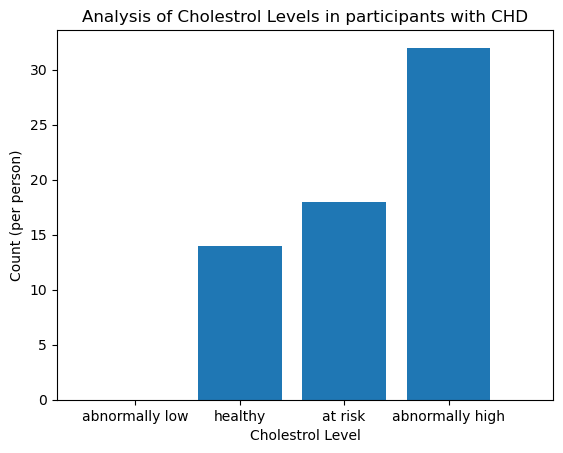

In [53]:
# Plotting Histogram of Cholestrol levels in relation to CHD prevalence

cholestrol_yaxis = chol_p1.groupby(['CHOLESTROL LEVEL'])['ID'].count()
cholestrol_yaxis

plt.bar(bin_names,cholestrol_yaxis,align='center')

plt.xlabel('Cholestrol Level')
plt.ylabel('Count (per person)')
plt.xlim(-0.75,len(bin_names))
plt.title('Analysis of Cholestrol Levels in participants with CHD')

plt.show()

# CHOLESTROL LEVEL
# abnormally low      0
# healthy            14
# at risk            18
# abnormally high    32

In [54]:
# Filtering participants with CHD by Sex, to view if there's any correlation 

chol_fm = chol_p1.loc[chol_p1['SEX']=='F',:]
chol_fm
# 25 females

chol_m = chol_p1.loc[chol_p1['SEX']=='M',:]
chol_m
# 39 males

female_chol_yaxis = chol_fm.groupby(['CHOLESTROL LEVEL'])['ID'].count()
female_chol_yaxis

# CHOLESTROL LEVEL AMONG FEMALES
# abnormally low      0
# healthy             5
# at risk             6
# abnormally high    14

male_chol_yaxis = chol_m.groupby(['CHOLESTROL LEVEL'])['ID'].count()
male_chol_yaxis

# CHOLESTROL LEVEL AMONG MALES
# abnormally low      0
# healthy             9
# at risk            12
# abnormally high    18

CHOLESTROL LEVEL
abnormally low      0
healthy             9
at risk            12
abnormally high    18
Name: ID, dtype: int64

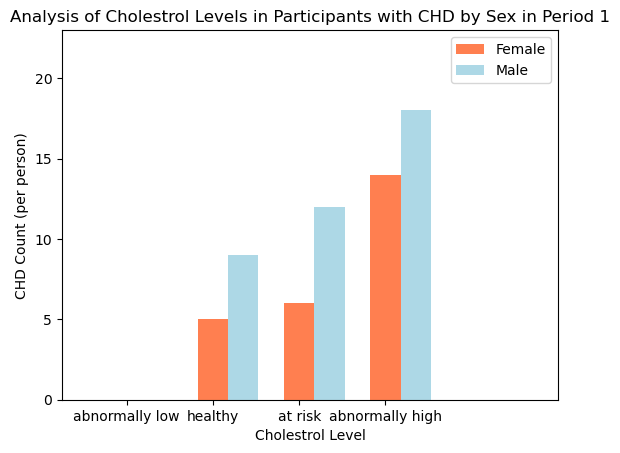

In [139]:
# Plotting Histogram of Cholestrol levels in relation to CHD prevalence BY SEX
bar_width = 0.35
x1 = range(len(bin_names))
x2 = [x + bar_width for x in x1]

plt.bar(x1,female_chol_yaxis,width=bar_width, align='center',label = 'Female',color='coral')
plt.bar(x2,male_chol_yaxis,width=bar_width, align='center',label = 'Male',color='lightblue')
plt.xlabel('Cholestrol Level')
plt.ylabel('CHD Count (per person)')
plt.xlim(-0.75,len(bin_names)+1)
plt.ylim(0, max(max(female_chol_yaxis), max(male_chol_yaxis)) + 5)

tick_pla = [value for value in x1]
plt.xticks(tick_pla, bin_names)

plt.title('Analysis of Cholestrol Levels in Participants with CHD by Sex in Period 1')
plt.legend()
plt.show()

In [56]:
# Creating pivot table to better analyse relationship between CHD, Cholestrol and Sex

cholestrol_table = pd.DataFrame()
cholestrol_table = chol_p1.groupby(['SEX','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
cholestrol_table = cholestrol_table.reset_index() 
cholestrol_table

# Create Pivot Table with above
cholestrol_pivot = cholestrol_table.pivot(index = 'CHOLESTROL LEVEL', columns='SEX',values='PREVALENT CHD')
cholestrol_pivot

SEX,F,M
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,5,9
at risk,6,12
abnormally high,14,18


In [57]:
#hmm should i still do chi test?
#Cholestrol distribution chi test, with both sexes

# observedcholestrol = pd.Series(cholestrol_pivot,index=)

# cholestrolchi = pd.DataFrame([observedcholestrol]).T

# # Renaming column
# # cholestrolchi.columns = ['Observed']

# cholestrolchi

In [15]:
# Find expected values for chi test
#formula to find E = rowtotal*columntotal/grandtotal
#E1 = 0*0/64 = 0
#E2 = 14*64/64
#E3
#E4

In [58]:
# CHD, CHOLESTROL AND SMOKING in PERIOD 1

# Creating pivot table for cleaner analysis between CHD, Cholestrol and Smoking status

chol_smoking_table = pd.DataFrame()
chol_smoking_table = chol_p1.groupby(['SMOKING STATUS','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
chol_smoking_table = chol_smoking_table.reset_index() 
chol_smoking_table

# Create Pivot Table with above
chol_smoking_pivot = chol_smoking_table.pivot(index = 'CHOLESTROL LEVEL', columns='SMOKING STATUS',values='PREVALENT CHD')
chol_smoking_pivot


SMOKING STATUS,NO,YES
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,8,6
at risk,12,6
abnormally high,20,12


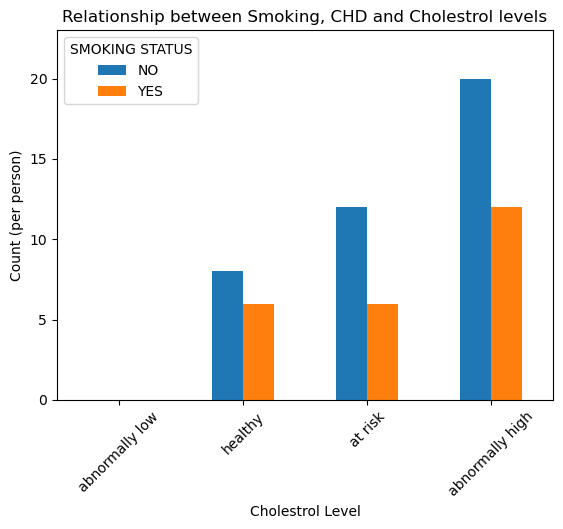

In [65]:
# Plot Smoking Status in Relation to Cholestrol Level for participants with CHD

chol_smoking_pivot.plot(kind='bar',xlabel='Cholestrol Level',label='Smoking Status',stacked=False,
                         rot=45,ylabel='Count (per person)',title='Relationship between Smoking, CHD and Cholestrol levels')

plt.ylim(0,23)
plt.show()

In [ ]:
# Analysis

#   there appears to be no positive correlation between smoking and CHD in Period 1

#   however, a trend appears to show among persons with higher cholestrol levels and their CHD probability
#       Therefore it logically makes better sense to dive deeper into the cholestrol and CHD counts

In [124]:
# CHD, CHOLESTROL AND SMOKING in PERIOD 3

# Filter by Period 3 only this time 

chol_p3 = chol_df.loc[chol_df['PERIOD']==3,:]
chol_p3

# Filter again by PREVALENCT CHD=='YES'

chol_p3_yes = chol_p3.loc[chol_p3['PREVALENT CHD']=='YES',:]
chol_p3_yes

,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
56,68397,M,320.0,YES,YES,8,3,abnormally high
101,134914,F,180.0,YES,YES,40,3,healthy
155,199546,F,228.0,YES,NO,0,3,at risk
179,208566,M,223.0,YES,NO,0,3,at risk
194,228129,F,274.0,YES,NO,0,3,abnormally high
...,...,...,...,...,...,...,...,...
8192,9906195,F,239.0,YES,NO,0,3,at risk
8225,9939850,F,280.0,YES,NO,0,3,abnormally high
8234,9951694,M,238.0,YES,NO,0,3,at risk
8240,9964282,M,189.0,YES,NO,0,3,healthy


In [125]:

# Creating pivot table for cleaner analysis between CHD, Cholestrol and Smoking status

chol_smoking_table3 = pd.DataFrame()
chol_smoking_table3 = chol_p3_yes.groupby(['SMOKING STATUS','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
chol_smoking_table3 = chol_smoking_table3.reset_index() 
chol_smoking_table3

# Create Pivot Table with above
chol_smoking_pivot3 = chol_smoking_table3.pivot(index = 'CHOLESTROL LEVEL', columns='SMOKING STATUS',values='PREVALENT CHD')
chol_smoking_pivot3

SMOKING STATUS,NO,YES
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,37,23
at risk,72,27
abnormally high,110,31


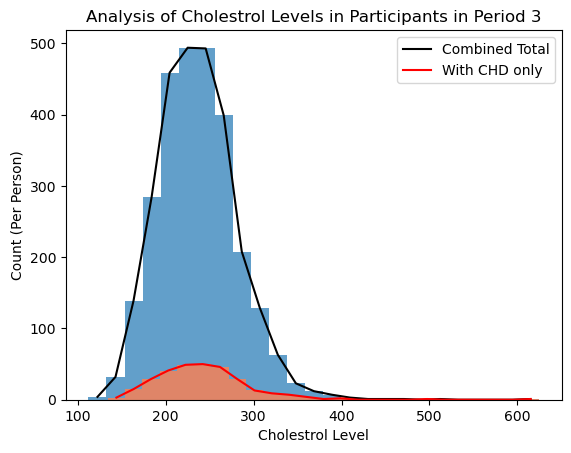

625.0

In [140]:
# MAKE A BELL CURVE GRAPH OF PERIOD 3

# Create a new table, with Cholestrol (numerical values), ID, CHD Prevalence

cholestrol_df = pd.DataFrame()
cholestrol_df = chol_p3[['ID','TOTAL CHOLESTROL','PREVALENT CHD']]
cholestrol_df



counts, bin_middles,_=plt.hist(cholestrol_df['TOTAL CHOLESTROL'],bins=25,alpha=0.7)
bin_widths=bin_middles[1:]-bin_middles[:-1]
bin_centers = bin_middles[:-1]+bin_widths/2
plt.plot(bin_centers,counts,'black',label = 'Combined Total')

counts_withchdonly, bin_middles2,_=plt.hist(chol_p3_yes['TOTAL CHOLESTROL'],bins=25,alpha=0.8,color='coral')
bin_widths2=bin_middles2[1:]-bin_middles2[:-1]
bin_centers2= bin_middles2[:-1]+bin_widths2/2
plt.plot(bin_centers2,counts_withchdonly,'r',label = 'With CHD only')

plt.xlabel('Cholestrol Level')
plt.ylabel('Count (Per Person)')
plt.title('Analysis of Cholestrol Levels in Participants in Period 3')
plt.legend()
plt.show()
cholestrol_df['TOTAL CHOLESTROL'].max()

In [ ]:
# Findings

#   We see there may not actually be a strong correlation between cholestrol levels and CHD, as when we plotted the
#   the data of cholestrol among both non-chd and chd participants, relative to chd participants, we see that the lack
#   of participants with CHD may be misrepresenting the data.
# hmm actually, im going to revisit this analysis.